In [2]:
options(repr.matrix.max.rows = 20, repr.matrix.max.cols = 80)
library(ggplot2)

In [6]:
## example of USAT long file (this is a subset of the full stacked file)
########################################################################
usat <- misc::readData("./usat_h_2019h1_longfile_subset_example.csv")
head(usat)

metric_sort
1 296        
2 296        
3 296        
4 296        
5 296        
6 296        
  metric_type                                                                                              
1 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Video call quality (among video call users)
2 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Video call quality (among video call users)
3 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Video call quality (among video call users)
4 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Video call quality (among video call users)
5 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Video call quality (among video call users)
6 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Video call quality (among video call users)
  market period survey_type platform product_category product_code product_name
1 US     2018H1 Mobile      Android  Social           SNAPCHAT     SnapChat    
2 US     2018H1 Mobile      iOS      Social           SNAPCHAT     SnapChat    
3 India  2018H1 Mobile      Android  Social           SNAPCHAT     Snapchat    
4 Brazil 2018H1 Mobile      Android  Social           SNAPCHAT     SnapChat    
5 US     2017H2 Mobile      Android  Social           SNAPCHAT     SnapChat    
6 US     2017H2 Mobile      iOS      Social           SNAPCHAT     SnapChat    
  subgroup     google_product primary_google_product unweighted_numerator
1 Adults Total N              N                      151                 
2 Adults Total N              N                      118                 
3 Adults Total N              N                      556                 
4 Adults Total N              N                      472                 
5 Adults Total N              N                      162                 
6 Adults Total N              N                      154                 
  unweighted_base unweighted_small_base unweighted_metric_value
1 290             NA                    0.5206897              
2 239             NA                    0.4937238              
3 755             NA                    0.7364238              
4 698             NA                    0.6762178              
5 281             NA                    0.5765125              
6 258             NA                    0.5968992              
  unweighted_95pct_lci unweighted_95pct_uci unweighted_stat_test_wow
1 NA                   NA                   no change               
2 NA                   NA                   decrease                
3 NA                   NA                   increase                
4 NA                   NA                   no change               
5 NA                   NA                   no change               
6 NA                   NA                   no change               
  weighted_numerator weighted_base weighted_small_base weighted_metric_value
1 162.1593           300.9491      NA                  0.5388264            
2 121.8263           243.3995      NA                  0.5005198            
3 536.9365           749.7762      NA                  0.7161291            
4 450.0803           699.8052      NA                  0.6431508            
5 165.9288           282.2763      NA                  0.5878238            
6 185.9088           293.7476      NA                  0.6328861            
  weighted_95pct_lci weighted_95pct_uci weighted_stat_test_wow effective_base
1 NA                 NA                 no change              269.5         
2 NA                 NA                 decrease               191.7         
3 NA                 NA                 increase               458.1         
4 NA                 NA                 no change              320.0         
5 NA                 NA                 no change              222.5         
6 NA                 NA                 no change              209.2         
  diff_base diff_pct_base diff_metric_value diff_pct_m

In [14]:
## get subset of interest
## market -- period -- survey_type -- platform -- product_code -- Brand -- Subgroup -- (waves)
## e.g. US -- Maps -- Favourability -- Google -- Female -- (waves to trend)
usub <- usat[
    grepl("Dimensions of Satisfaction", usat$metric_type) &
    grepl("Ease of use", usat$metric_type) &
    usat$market == "US" &
    usat$period %in% c("2019H1", "2018H2", "2018H1", "2017H2", "2017H1") &
    usat$survey_type == "Mobile" &
    usat$platform == "iOS" &
    usat$product_category == "Social" &
    usat$product_code == "SNAPCHAT" &
    usat$subgroup == "Adults Total",

]
usub[ 
    order(usub$period), 
    c("metric_type", "period", "product_code", "weighted_metric_value")
]

metric_type                                                              
147378 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Ease of use
147374 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Ease of use
147370 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Ease of use
326531 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Ease of use
395033 Dimensions of Satisfaction (Extremely/Moderately Satisfied) | Ease of use
       period product_code weighted_metric_value
147378 2017H1 SNAPCHAT     0.7420895            
147374 2017H2 SNAPCHAT     0.7695146            
147370 2018H1 SNAPCHAT     0.5774739            
326531 2018H2 SNAPCHAT     0.7536739            
395033 2019H1 SNAPCHAT     0.7010783

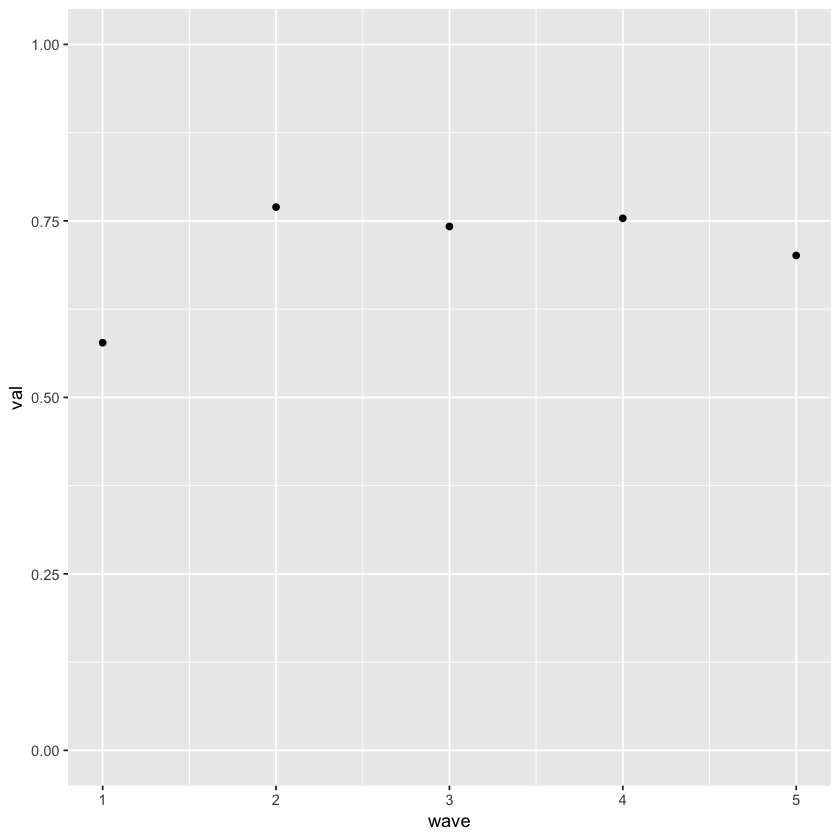

In [23]:
vals <- usub$weighted_metric_value
ggplot(data.frame(wave = 1:length(vals), val = vals), aes(x = wave, y = val)) + 
    geom_point() + ylim(0, 1)

In [9]:
## example of BP datasheet (for one wave. real data would be stacked waves.)
############################################################################
bp <- misc::readData("./product_m_wave028_Sample - CE Questions.csv")
tail(bp)

Hidden Sort Country Product Category          Metric Type
205711 402730      US      Wireless Service Provider Perception 
205712 402731      US      Wireless Service Provider Perception 
205713 402734      US      Wireless Service Provider Perception 
205714 402735      US      Wireless Service Provider Perception 
205715 402736      US      Wireless Service Provider Perception 
205716 402737      US      Wireless Service Provider Perception 
       Base Note                        Metric Name Brand   Stats Type
205711 Nationally Rep and product aware Attributes  Verizon Pct       
205712 Nationally Rep and product aware Attributes  Verizon Pct       
205713 Nationally Rep and product aware Attributes  Verizon Pct       
205714 Nationally Rep and product aware Attributes  Verizon Pct       
205715 Nationally Rep and product aware Attributes  Verizon Pct       
205716 Nationally Rep and product aware Attributes  Verizon Pct       
       Response Used KTA Subgroup                  Base Size Small base flag
205711 Visionary     KTA 25-44                     241       NA             
205712 Visionary     KTA Change Agents             831       NA             
205713 Visionary     NA  Smartphone OS: Android    426       NA             
205714 Visionary     NA  Smartphone OS: iOS/iPhone 299       NA             
205715 Visionary     NA  Orange                     90       X              
205716 Visionary     NA  Red                       203       NA             
       Effective Base Time Series Metric Value 95% CL lower 95% CL upper
205711 200.5          8/1/19      45.31770     39.15535     51.62698    
205712 601.6          8/1/19      55.32212     51.92512     58.67014    
205713 365.9          8/1/19      45.26438     40.60099     50.01241    
205714 263.3          8/1/19      47.26780     41.67944     52.92547    
205715  65.8          8/1/19      45.11605     35.24609     55.38587    
205716 167.4          8/1/19      51.23717     44.40229     58.02610    
       Frequency V20 V21 V22 Classification Product_rollup google_product
205711 Monthly   NA  NA  NA  NA             NA             N             
205712 Monthly   NA  NA  NA  NA             NA             N             
205713 Monthly   NA  NA  NA  NA             NA             N             
205714 Monthly   NA  NA  NA  NA             NA             N             
205715 Monthly   NA  NA  NA  NA             NA             N             
205716 Monthly   NA  NA  NA  NA             NA             N             
       primary_google_product stat_test_wow Difference stat_test_yoy
205711 N                      n/a           NA         n/a          
205712 N                      n/a           NA         n/a          
205713 N                      n/a           NA         n/a          
205714 N                      n/a           NA         n/a          
205715 N                      n/a           NA         n/a          
205716 N                      n/a           NA         n/a          
       Difference_yoy
205711 NA            
205712 NA            
205713 NA            
205714 NA            
205715 NA            
205716 NA

In [32]:
## get subset of interest
## Country -- Product Category -- Metric Name -- Brand -- Subgroup -- (waves)
## e.g. US -- Maps -- Favourability -- Google -- Female -- (waves to trend)
bpsub <- bp[
    bp$Country == "US" &
    bp[["Product Category"]] == "Maps" &
    bp[["Metric Name"]] == "Favourability" &
    bp$Brand == "Google Maps" &
    bp$Subgroup == "Female",

]
bpsub[ 
    , 
    c("Metric Name", "Brand", "Stats Type", "Response Used", "Metric Value")
]

Metric Name   Brand       Stats Type
166161 Favourability Google Maps Pct       
166211 Favourability Google Maps Pct       
166261 Favourability Google Maps Pct       
166311 Favourability Google Maps Pct       
166361 Favourability Google Maps Pct       
166411 Favourability Google Maps Pct       
166461 Favourability Google Maps Pct       
       Response Used                           Metric Value
166161 Top-2-Box [Very / somewhat positive]    78.555610   
166211 Bottom-2-Box [Very / somewhat negative]  1.584234   
166261 Very positive                           52.261712   
166311 Somewhat positive                       26.293898   
166361 Neutral - neither positive nor negative 19.860156   
166411 Somewhat negative                        1.385260   
166461 Very negative                            0.198975

In [7]:
sum(bpsub[!grepl("Box", bpsub[["Response Used"]]), "Metric Value"])

[1] 100

[1] 78.555610  1.584234 52.261712 26.293898 19.860156  1.385260  0.198975

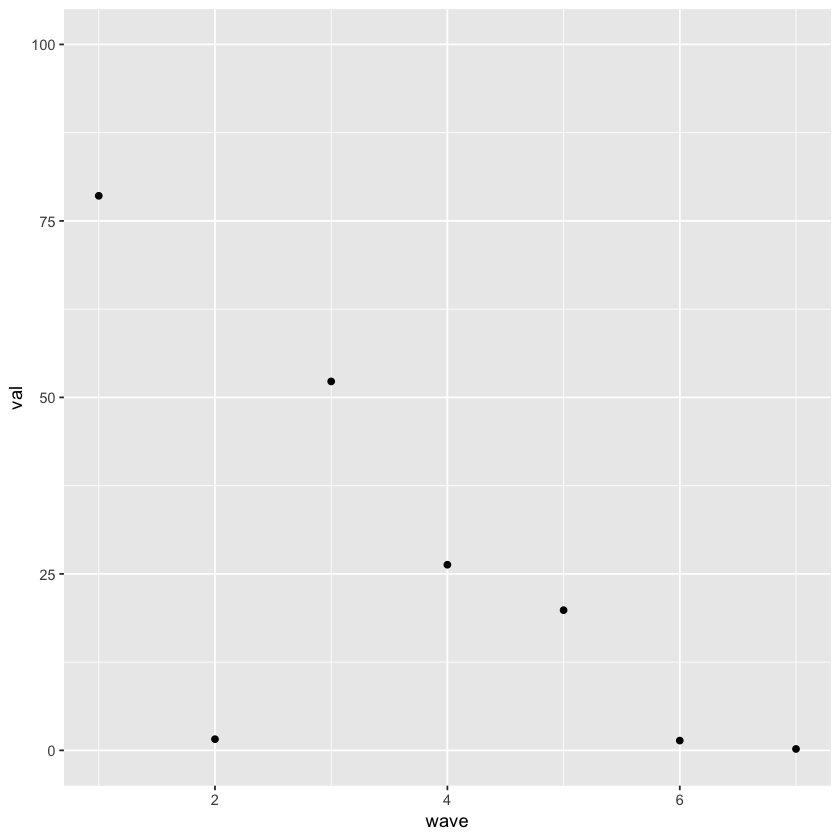

In [30]:
vals <- bpsub[
    , ## bpsub$waves %in% c(waves to trend)
    "Metric Value"
]
vals
ggplot(data.frame(wave = 1:length(vals), val = vals), aes(x = wave, y = val)) + 
    geom_point() + ylim(0, 100)

In [31]:
## trend test w/ 1-lag detection and correction
###############################################
waves <- seq(from = 1, to = length(vals), by = 1)
## linear model
model <- lm(vals ~ waves)
res <- summary(model)$coefficients
## check for lag of order 1 (autocorrelation / serial correlation)
if (all(vals == 0)) {
    bgPvalue <- Inf
} else {
    brGodfrey <- lmtest::bgtest(model, order = 1, type = "F")
    bgPvalue <- brGodfrey[["p.value"]]
}
cat("bgPvalue: ", bgPvalue)
## if there is a 1-lag re-run linear test with newey west standard errors
if (!is.nan(bgPvalue) && bgPvalue < .05) {
    nwCoeff <- sandwich::NeweyWest(model, lag = 1)
    res <- lmtest::coeftest(model, vcov = nwCoeff)
}
res

bgPvalue:  0.1648771

Estimate  Std. Error t value   Pr(>|t|)  
(Intercept) 64.001322 19.979002   3.203429 0.02390343
waves       -9.566765  4.467441  -2.141442 0.08516184

In [32]:
pvalue <- res["waves", "Pr(>|t|)"]
est <- res["waves", "Estimate"]
intercept <- res["(Intercept)", "Estimate"]
direction <- if (est < 0) "-" else if (est > 0) "+" else "="
list(pvalue = pvalue, est = est, intercept = intercept, direction = direction)

$pvalue
[1] 0.08516184

$est
[1] -9.566765

$intercept
[1] 64.00132

$direction
[1] "-"